In [53]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Importing dataset, creating dataframe df to view it
df = pd.read_csv('https://raw.githubusercontent.com/szilvasipeter2000/coding1_team-project/main/cardio_fitness.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [8]:
# Showing comparative descriptive statistics for each product comparatively
df.groupby('Product').describe().round(2)

Age                                              Education         \
        count   mean   std   min    25%   50%    75%   max     count   mean   
Product                                                                       
TM195    80.0  28.55  7.22  18.0  23.00  26.0  33.00  50.0      80.0  15.04   
TM498    60.0  28.90  6.65  19.0  24.00  26.0  33.25  48.0      60.0  15.12   
TM798    40.0  29.10  6.97  22.0  24.75  27.0  30.25  48.0      40.0  17.32   

         ...   Income           Miles                                     \
         ...      75%       max count    mean    std   min    25%    50%   
Product  ...                                                               
TM195    ...  53439.0   68220.0  80.0   82.79  28.87  38.0   66.0   85.0   
TM498    ...  53439.0   67083.0  60.0   87.93  33.26  21.0   64.0   85.0   
TM798    ...  90886.0  104581.0  40.0  166.90  60.07  80.0  120.0  160.0   

                       
           75%    max  
Product                
TM195     94.0  188.0  
TM498    106.0  212.0  
TM798    200.0  360.0  

[3 rows x 48 columns]

In [9]:
# Importing libraries for regressions
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mizani import transforms
from stargazer.stargazer import Stargazer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import log_loss

warnings.filterwarnings("ignore")

In [10]:
# Creating dummy variables for TM498 and TM798
df['ID_TM498'] = (df['Product'] == 'TM498').astype(int)
df['ID_TM798'] = (df['Product'] == 'TM798').astype(int)

In [11]:
# Creating a lnw variable for ln income
df['lnw'] = np.log(df["Income"])

In [12]:
# Creating dummy variables for gender (female=1) and fitness level >= 4 as 'high_fitness'
df['female'] = (df['Gender'] == 'Female').astype(int)
df['high_fitness'] = (df['Fitness'] >= 4).astype(int)

In [13]:
# Creating multiple regression models
reg1 = smf.ols("lnw ~ ID_TM498 + ID_TM798", data=df).fit(cov_type="HC1") # ln inc on all products
reg2 = smf.ols("lnw ~ ID_TM498 + ID_TM798 + female", data=df).fit(cov_type='HC1') # Adding gender
reg3 = smf.ols('lnw ~ ID_TM498 + ID_TM798 + female + Age + high_fitness', data=df).fit(cov_type='HC1') # Adding age and high_fitness

In [14]:
# Stargazer to view regression results
stargazer = Stargazer([reg1, reg2, reg3])
stargazer.covariate_order(['ID_TM498', 'ID_TM798', 'female', "Age", "high_fitness", "Intercept"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer

Results from these regression analysis show that product TM497 users have on average 5.7% more income than TM195 users when not controling for anything else.

TM798 users are expected to have 47.4% more income than TM195 users.

When controlling for gender, female users of TM195 have .5% less income on average.

The coefficient on age shows that TM195 users, when accounting for each additional year of age, have 2.2% more inc with each year of age.

For high_fitness, those considered to be fit have 1.4% less income. This could imply that TM195 users are less fit and more fit users use the other products.

# Customer Profiles

![WhatsApp-kép, 2023-12-12, 12.50.49_74b91b0b.jpg](<attachment:WhatsApp-kép, 2023-12-12, 12.50.49_74b91b0b.jpg>)
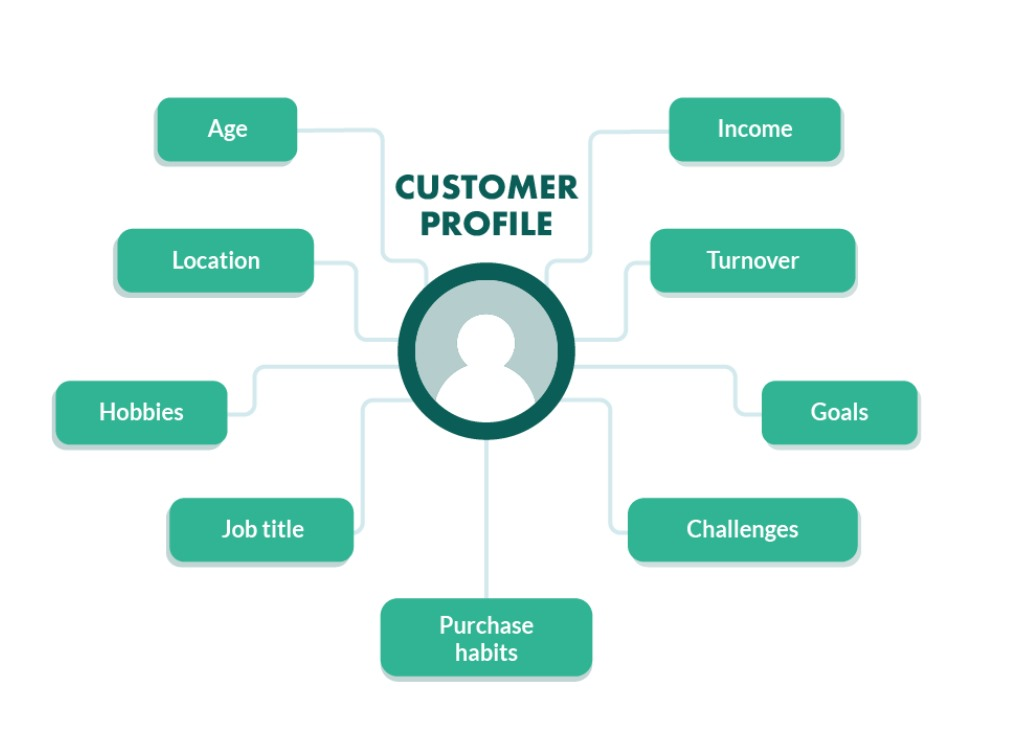

In [51]:
for column in df[['Product','age_group','Gender','MaritalStatus','Education','Usage','Fitness','high_fitness']].columns:
    print(f"{column}:")
    print(df[column].value_counts())
    print()
    print(f'There are {df[column].isnull().sum()} missing values')
    print('############################\n')

Product:
TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

There are 0 missing values
############################

age_group:
16-30    120
31-40     48
41-50     12
Name: age_group, dtype: int64

There are 0 missing values
############################

Gender:
Male      104
Female     76
Name: Gender, dtype: int64

There are 0 missing values
############################

MaritalStatus:
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

There are 0 missing values
############################

Education:
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

There are 0 missing values
############################

Usage:
3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

There are 0 missing values
############################

Fitness:
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

There are 0 missing values
############################

high_fitness:
0    125
1

In [42]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,female,male,married,single,high_fitness,age_group,income_group
0,TM195,18,Male,14,Single,3,4,29562,112,0,1,0,1,1,16-30,"< $30,000"
1,TM195,19,Male,15,Single,2,3,31836,75,0,1,0,1,0,16-30,"$30,000 - $50,000"
2,TM195,19,Female,14,Partnered,4,3,30699,66,1,0,1,0,0,16-30,"$30,000 - $50,000"
3,TM195,19,Male,12,Single,3,3,32973,85,0,1,0,1,0,16-30,"$30,000 - $50,000"
4,TM195,20,Male,13,Partnered,4,2,35247,47,0,1,1,0,0,16-30,"$30,000 - $50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200,0,1,0,1,1,31-40,"$70,000 - $90,000"
176,TM798,42,Male,18,Single,5,4,89641,200,0,1,0,1,1,41-50,"$70,000 - $90,000"
177,TM798,45,Male,16,Single,5,5,90886,160,0,1,0,1,1,41-50,">= $90,000"
178,TM798,47,Male,18,Partnered,4,5,104581,120,0,1,1,0,1,41-50,">= $90,000"


In [66]:
# Creating dummy variables for gender (female=1) and fitness level >= 4 as 'high_fitness'
df['female'] = (df['Gender'] == 'Female').astype(int)
df['male'] = (df['Gender'] == 'Male').astype(int)
df['married'] = (df['MaritalStatus'] == 'Partnered').astype(int)
df['single'] = (df['MaritalStatus'] == 'Single').astype(int)
df['high_fitness'] = (df['Fitness'] >= 4).astype(int)

# Define the age groups using a lambda function
df['age_group'] = df['Age'].apply(lambda x: '0-15' if x <= 15 else '16-30' if x <= 30 else '31-40' if x <= 40 else '41-50' if x <= 50 else '51-60' if x <= 60 else '61+')

# Define income groups using a lambda function
df['income_group'] = df['Income'].apply(lambda x: '$30k - $50k' if x <= 50000 else '$50k - $70k' if x <= 70000 else '$70k+')


# View the updated dataframe
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,female,male,married,single,high_fitness,age_group,income_group
0,TM195,18,Male,14,Single,3,4,29562,112,0,1,0,1,1,16-30,$30k - $50k
1,TM195,19,Male,15,Single,2,3,31836,75,0,1,0,1,0,16-30,$30k - $50k
2,TM195,19,Female,14,Partnered,4,3,30699,66,1,0,1,0,0,16-30,$30k - $50k
3,TM195,19,Male,12,Single,3,3,32973,85,0,1,0,1,0,16-30,$30k - $50k
4,TM195,20,Male,13,Partnered,4,2,35247,47,0,1,1,0,0,16-30,$30k - $50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200,0,1,0,1,1,31-40,$70k+
176,TM798,42,Male,18,Single,5,4,89641,200,0,1,0,1,1,41-50,$70k+
177,TM798,45,Male,16,Single,5,5,90886,160,0,1,0,1,1,41-50,$70k+
178,TM798,47,Male,18,Partnered,4,5,104581,120,0,1,1,0,1,41-50,$70k+


In [49]:
df[['Product','age_group','Age','Education','Usage','Fitness','Income','Miles','female','male','married','single','high_fitness']].groupby(['Product','age_group']).aggregate(['mean']).round(2)

Age Education Usage Fitness    Income   Miles female  \
                    mean      mean  mean    mean      mean    mean   mean   
Product age_group                                                           
TM195   16-30      24.44     14.85  3.11    2.95  43123.31   83.98   0.51   
        31-40      35.21     15.26  2.95    3.00  52302.00   81.74   0.47   
        41-50      45.17     16.00  3.33    3.00  57987.00   75.17   0.50   
TM498   16-30      24.11     14.54  3.11    2.91  43790.74   90.80   0.49   
        31-40      34.65     15.91  3.09    2.91  56225.22   86.61   0.52   
        41-50      46.50     16.00  2.00    2.50  56281.50   53.00   0.00   
TM798   16-30      25.70     17.27  4.77    4.53  69309.37  156.53   0.20   
        31-40      35.17     17.50  5.00    5.00  92961.00  220.00   0.17   
        41-50      45.50     17.50  4.50    4.75  95154.00  165.00   0.00   

                   male married single high_fitness  
                   mean    mean   mean         mean  
Product age_group                                    
TM195   16-30      0.49    0.58   0.42         0.13  
        31-40      0.53    0.58   0.42         0.16  
        41-50      0.50    0.83   0.17         0.17  
TM498   16-30      0.51    0.49   0.51         0.14  
        31-40      0.48    0.74   0.26         0.13  
        41-50      1.00    1.00   0.00         0.00  
TM798   16-30      0.80    0.57   0.43         0.87  
        31-40      0.83    0.67   0.33         1.00  
        41-50      1.00    0.50   0.50         1.00

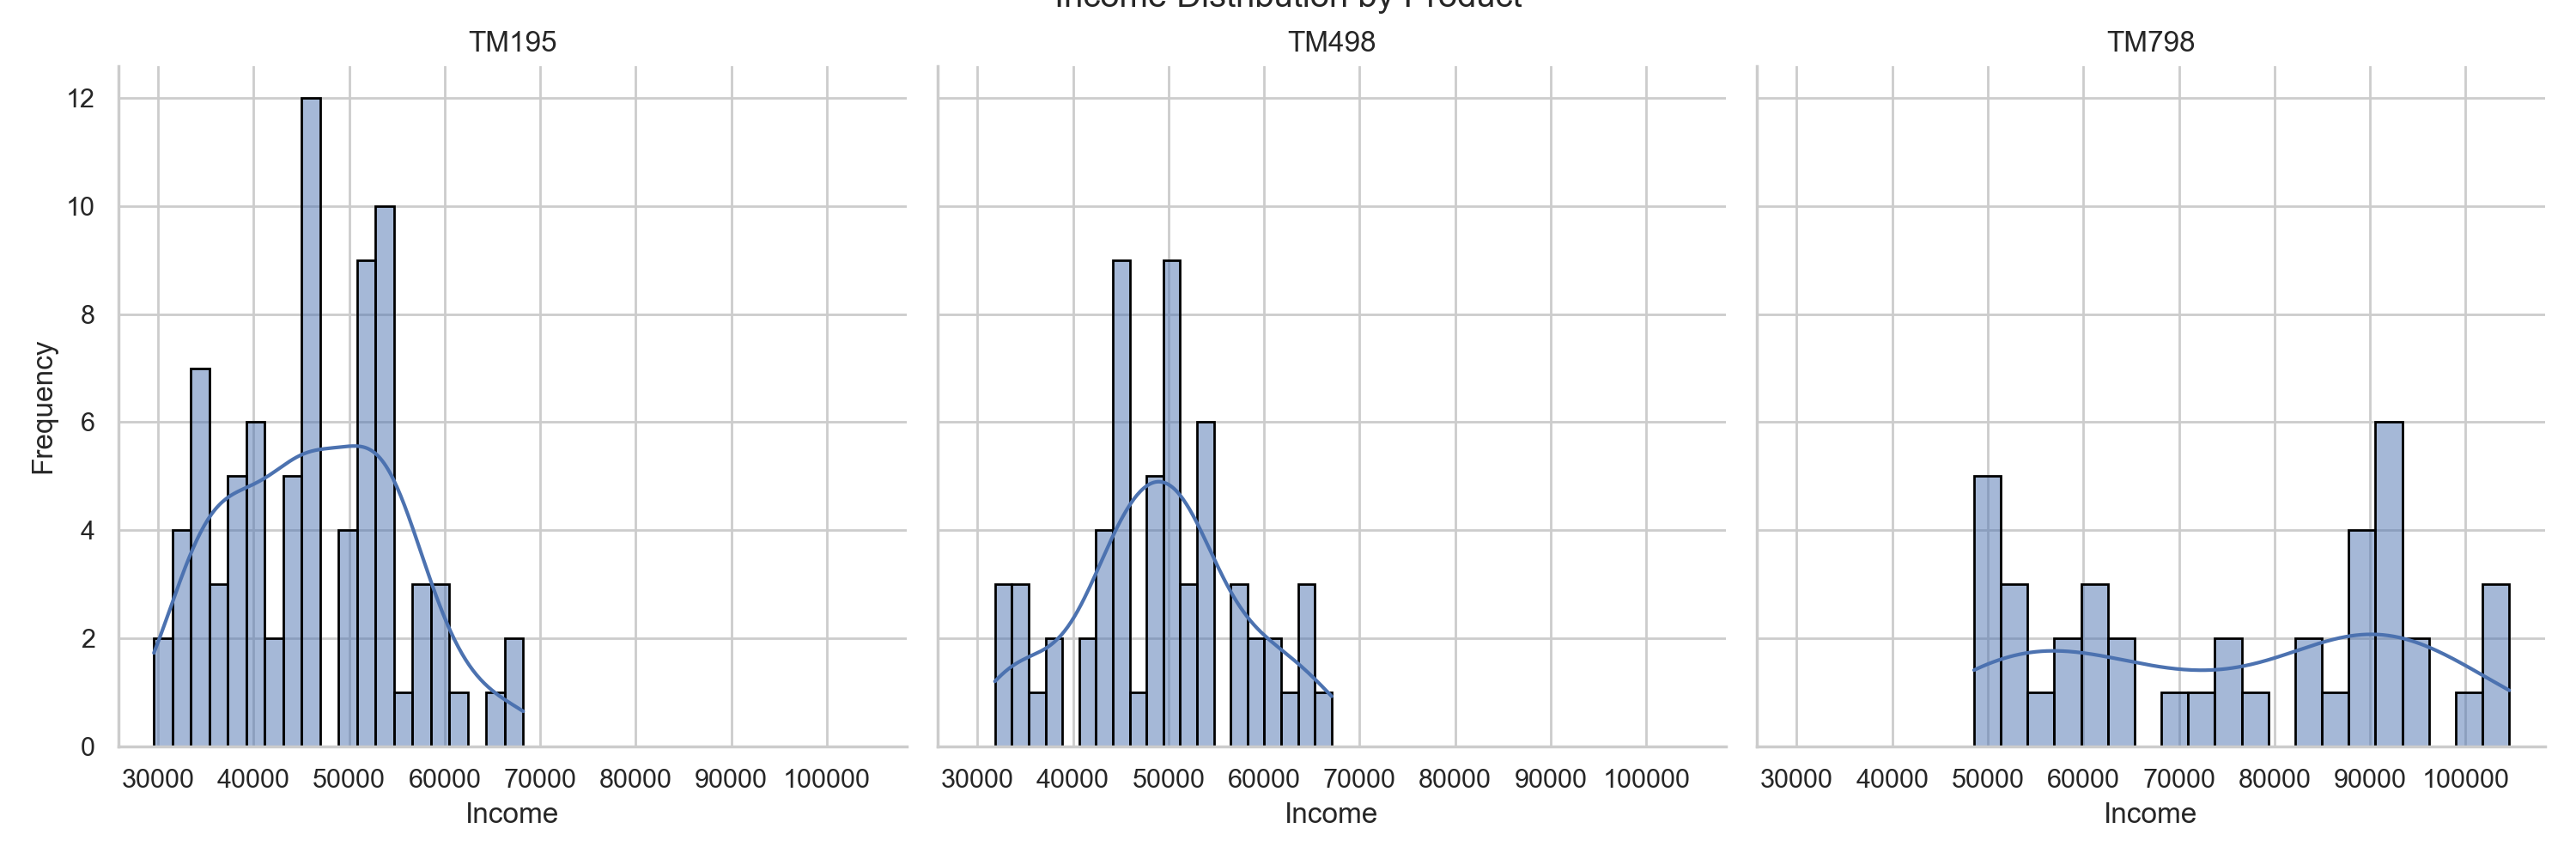

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create subplots with facets for each product
g = sns.FacetGrid(df, col="Product", col_wrap=3, height=5, margin_titles=True)
g.map(sns.histplot, 'Income', bins=20, kde=True, edgecolor='black')

# Customize the appearance
g.set_axis_labels('Income', 'Frequency')
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Income Distribution by Product', y=1.02)

# Show plot
plt.show()


In [64]:
# From this we can see that TM798 is pruchased mostly by people with higher income, while the other two is purchased by people with lower income and those two cannot really be told apart